In [21]:
import cv2
import numpy as np
#!pip install opencv

In [5]:
import matplotlib.pyplot as plt 

In [7]:
face_cascade =  cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [9]:
image_path = r'C:\Users\DM\Downloads\animals_hero_pygmy_hippo.jpg'
image =cv2.imread(image_path)
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)


In [15]:
faces = face_cascade.detectMultiScale(gray_image,minNeighbors = 5, scaleFactor =1.1, minSize=(30,30))

In [25]:
for (x,y,w,h) in faces:
    cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)

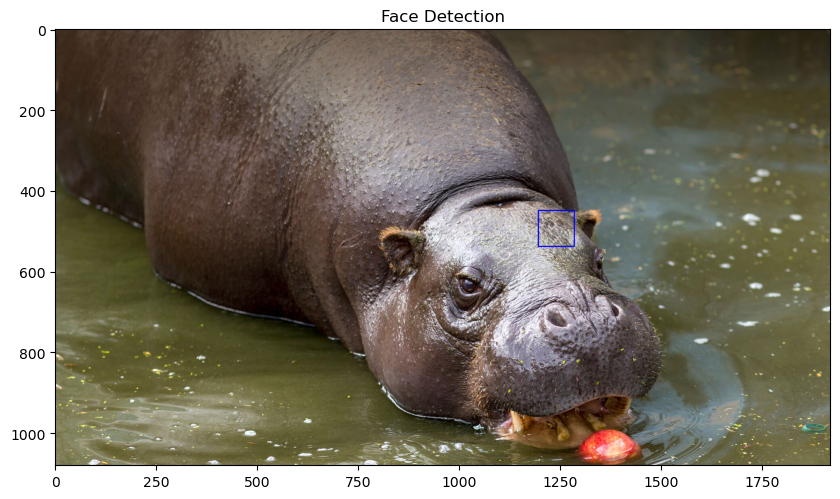

In [31]:
plt.figure(figsize=(10,8))
plt.title("Face Detection")
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.axis("on")
plt.show()

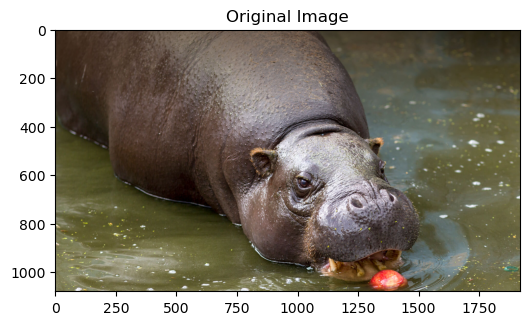

In [35]:
import cv2
import matplotlib.pyplot as plt

# Load an image (ensure you have an image file in the same directory or provide a path)
image_path = r"C:\Users\DM\Downloads\animals_hero_pygmy_hippo.jpg"  # Replace with the path to your image
image = cv2.imread(image_path)

# Display the original image
plt.figure(figsize=(6, 6))
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
plt.axis("on")
plt.show()

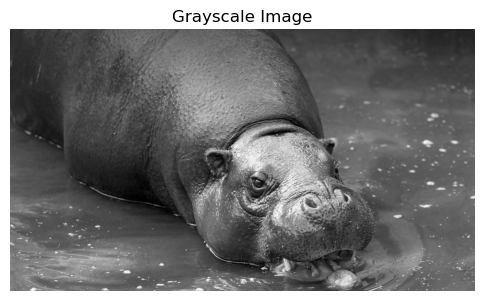

In [37]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.figure(figsize=(6, 6))
plt.title("Grayscale Image")
plt.imshow(gray_image, cmap="gray")
plt.axis("off")
plt.show()


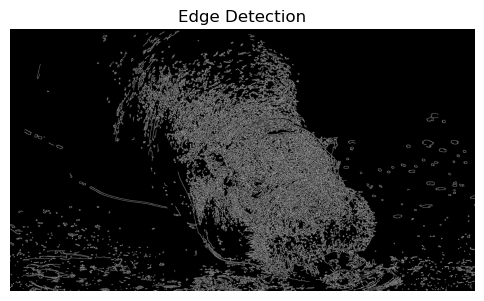

In [39]:
edges = cv2.Canny(gray_image, threshold1=50, threshold2=150)

# Display the edges
plt.figure(figsize=(6, 6))
plt.title("Edge Detection")
plt.imshow(edges, cmap="gray")
plt.axis("off")
plt.show()

In [43]:
import cv2

# Load the Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Start webcam video capture
cap = cv2.VideoCapture(0)

while True:
    # Read a frame from the webcam
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5)

    # Draw rectangles around faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Show the frame
    cv2.imshow("Webcam Face Detection", frame)

    # Break loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close windows
cap.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 

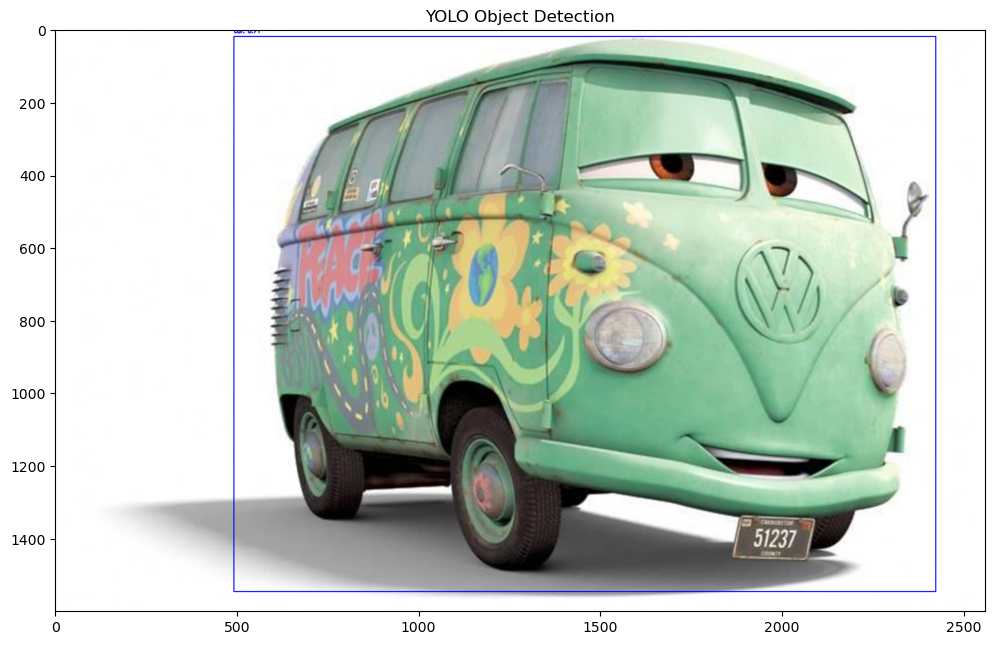

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load YOLO config and weights
config_path = r"C:\Users\DM\Downloads\New folder (2)\yolov3.cfg"  # Path to YOLO config
weights_path = r"C:\Users\DM\Downloads\New folder (2)\yolov3.weights"  # Path to YOLO weights
coco_names_path = r"C:\Users\DM\Downloads\New folder (2)\coco.names"  # Path to COCO class names

# Load class names
with open(coco_names_path, "r") as f:
    classes = f.read().strip().split("\n")

# Load the YOLO network
net = cv2.dnn.readNetFromDarknet(config_path, weights_path)

# Load an image
image_path = r"C:\Users\DM\Downloads\60523009-9.jpg"  # Replace with your image
image = cv2.imread(image_path)
height, width = image.shape[:2]

# Preprocess the image for YOLO
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
net.setInput(blob)

# Get YOLO layer names and output layers
layer_names = net.getLayerNames()
#output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Run inference
outputs = net.forward(output_layers)

# Extract bounding boxes, confidences, and class IDs
boxes, confidences, class_ids = [], [], []
for output in outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x, center_y, w, h = (detection[0:4] * np.array([width, height, width, height])).astype("int")
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, int(w), int(h)])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Apply Non-Maximum Suppression
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

# Draw bounding boxes
for i in indices.flatten():
    x, y, w, h = boxes[i]
    label = f"{classes[class_ids[i]]}: {confidences[i]:.2f}"
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
    cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Display the image
plt.figure(figsize=(12, 12))
plt.title("YOLO Object Detection")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("on")
plt.show()


What is Computer Vision?
Computer Vision (CV) is a field of artificial intelligence (AI) that enables computers and systems to derive meaningful information from digital images, videos, and other visual inputs. It involves teaching computers to "see," interpret, and make decisions based on the visual data, much like humans do.

Key Goals of Computer Vision
Understanding Images/Videos: Recognizing objects, people, and patterns.
Automating Visual Tasks: Mimicking human vision for applications like facial recognition or scene understanding.
Decision-Making: Using visual inputs to perform tasks like navigation or inspection.
Main Components of Computer Vision
Image Acquisition: Capturing images using devices like cameras or sensors.
Preprocessing: Enhancing images by filtering noise or adjusting resolution.
Feature Extraction: Identifying patterns, edges, or specific regions of interest in the image.
Classification/Segmentation: Categorizing or dividing the image into meaningful parts.
Object Detection/Recognition: Identifying and labeling objects within images.
Applications of Computer Vision
Healthcare: Diagnosing diseases through medical imaging like X-rays or MRIs.
Autonomous Vehicles: Enabling self-driving cars to detect obstacles, road signs, and lanes.
Surveillance: Monitoring public spaces with facial recognition or activity detection.
Retail: Assisting in automated checkouts and inventory management.
Agriculture: Analyzing crops, pests, and soil conditions using drone imagery.
Augmented Reality (AR): Powering interactive experiences in gaming and shopping.
Techniques and Tools
Machine Learning (ML) & Deep Learning: Using algorithms like Convolutional Neural Networks (CNNs) to analyze visual data.
OpenCV: A popular library for real-time computer vision.
PyTorch/TensorFlow: Frameworks for building and training deep learning models.

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Example of a simple Keras model
model = Sequential()
model.add(Dense(64, input_dim=8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model (example with random data)
import numpy as np
X_train = np.random.random((100, 8))
y_train = np.random.randint(2, size=(100, 1))

model.fit(X_train, y_train, epochs=10)

# Save the model as .h5
model.save(r"C:\Users\DM\Downloads\New folder (2)\model.h5")

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5469 - loss: 0.7011  
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4974 - loss: 0.6984   
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5512 - loss: 0.6882
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5537 - loss: 0.6871
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5316 - loss: 0.6888
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5255 - loss: 0.6878  
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5545 - loss: 0.6873
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5465 - loss: 0.6823  
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5370 - loss: 0.6845
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5528 - loss: 0.6876  


In [44]:


import streamlit as st
import tensorflow as tf
import numpy as np
from PIL import Image
import io

# Load your .h5 model
model_path = r"C:\Users\DM\Downloads\New folder (2)\model.h5"
def load_model(model_path):
    model = tf.keras.models.load_model(model_path)
    return model

# Function to make predictions
def predict(model, image):
    image = np.array(image)
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = image / 255.0  # Normalize if required by the model

    # Predict
    predictions = model.predict(image)
    return predictions

# Streamlit UI
def main():
    st.title("Object Detection with YOLO or Keras Model")
    st.write("Upload an image to detect objects using your model.")

    # Upload image
    uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png", "jpeg"])
    
    # Upload model file
    model_file = st.file_uploader("Upload your model (.h5 file)", type=["h5"])

    if uploaded_file is not None and model_file is not None:
        # Open the uploaded image with PIL
        image = Image.open(uploaded_file)
        
        # Load the model from the uploaded file
        model = load_model(model_file)

        # Make predictions
        predictions = predict(model, image)
        
        # Show the predictions (you can modify this depending on your model's output)
        st.write("Predictions:", predictions)

        # Display the image
        st.image(image, use_column_width=True)

if __name__ == "__main__":
    main()


2024-11-22 13:23:04.507 
  command:

    streamlit run C:\Users\DM\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
